### `1) Show me the market trends to help me decide. Which US real estate market is doing best overall?` 

### Real Estate Market Analysis: 1-Year and Month-over-Month Growth in Single-Family Home Values

Validation: All missing values have been handled.
Top 10 U.S. States by 1-Year Growth in Home Values:
       RegionName  StateName  1yr_change
10     New Jersey        0.0    8.527855
3        New York        0.0    7.385898
42   Rhode Island        0.0    7.255531
28    Connecticut        0.0    6.900515
40  New Hampshire        0.0    6.390579
14  Massachusetts        0.0    5.884220
38  West Virginia        0.0    5.678698
5        Illinois        0.0    5.577620
31         Nevada        0.0    5.425283
6            Ohio        0.0    5.352660

Top 10 Regions by Month-over-Month (MoM) Change:
       RegionName  StateName  MoM_change
50        Wyoming        0.0    0.797784
10     New Jersey        0.0    0.552128
3        New York        0.0    0.549347
40  New Hampshire        0.0    0.541314
42   Rhode Island        0.0    0.522160
43        Montana        0.0    0.476306
34         Kansas        0.0    0.431550
12     Washington        0.0    0.386399
29           Utah        0.0

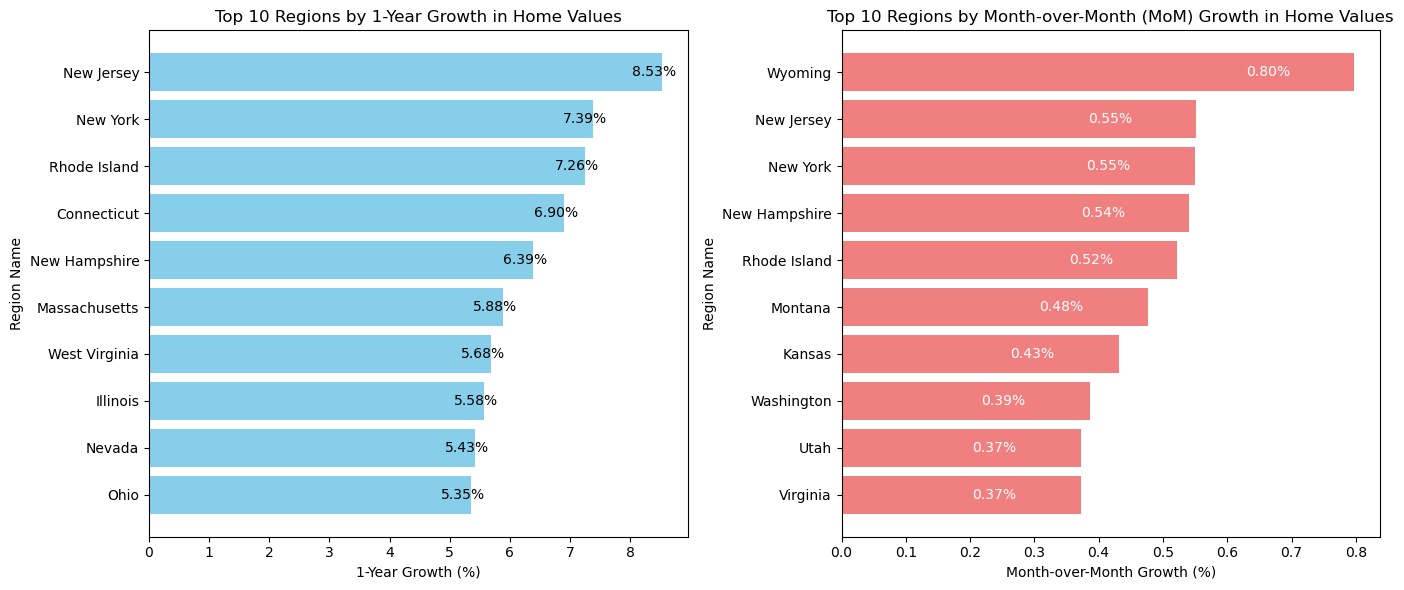

In [219]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the GitHub link
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/ZHVI%20Single-Family%20Homes%20Time%20Series.xlsx'
zhvi_data = pd.read_excel(file_url)

# Step 2: Handle missing or null values by replacing them with 0
zhvi_data.fillna(0, inplace=True)

# Validate: Check for any remaining missing values
if zhvi_data.isnull().sum().sum() > 0:
    print("There are still null values in the dataset.")
else:
    print("Validation: All missing values have been handled.")

# Step 3: Calculate 1-Year Growth
data_1yr = zhvi_data[['RegionName', 'StateName'] + list(zhvi_data.columns[-13:])].copy()
data_1yr['1yr_change'] = (
    (data_1yr.iloc[:, -1] - data_1yr.iloc[:, -13]) / data_1yr.iloc[:, -13].replace(0, 1) * 100
)
top_1yr = data_1yr.sort_values(by='1yr_change', ascending=False).head(10)

# Display the 1-Year Growth table
print("Top 10 U.S. States by 1-Year Growth in Home Values:")
print(top_1yr[['RegionName', 'StateName', '1yr_change']])

# Step 4: Calculate Month-over-Month (MoM) Growth
data_mom = zhvi_data[['RegionName', 'StateName'] + list(zhvi_data.columns[-2:])].copy()
data_mom['MoM_change'] = (
    (data_mom.iloc[:, -1] - data_mom.iloc[:, -2]) / data_mom.iloc[:, -2].replace(0, 1) * 100
)
top_mom = data_mom.sort_values(by='MoM_change', ascending=False).head(10)

# Display the MoM Growth table
print("\nTop 10 Regions by Month-over-Month (MoM) Change:")
print(top_mom[['RegionName', 'StateName', 'MoM_change']])

# Step 5: Create visualizations
plt.figure(figsize=(14, 6))

# Plot 1: 1-Year Growth
plt.subplot(1, 2, 1)
bars_1yr = plt.barh(top_1yr['RegionName'], top_1yr['1yr_change'], color='skyblue')
plt.xlabel('1-Year Growth (%)')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by 1-Year Growth in Home Values')
for bar in bars_1yr:
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             va='center', ha='left')

plt.gca().invert_yaxis()

# Plot 2: MoM Growth
plt.subplot(1, 2, 2)
bars_mom = plt.barh(top_mom['RegionName'], top_mom['MoM_change'], color='lightcoral')
plt.xlabel('Month-over-Month Growth (%)')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by Month-over-Month (MoM) Growth in Home Values')

# Adjust the labels for MoM bars
for bar in bars_mom:
    plt.text(
        bar.get_width() - 0.1,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.2f}%',  
        va='center',  
        ha='right',  
        color='white'  
    )

plt.gca().invert_yaxis()

# Adjust layout and display
plt.tight_layout()
plt.show()


<u>**Top 10 Regions by 1-Year** and **Month-over-Month (MoM)** Growth in Home Values</u>

The left chart shows the top 10 regions with the highest **1-year** growth in home values, highlighting longer-term market trends. The right chart displays the top 10 regions with the highest **Month-over-Month (MoM)** growth, reflecting more recent short-term changes.

#### Key Insights:
1. **1-Year Growth**:
   - New Jersey (8.53%), New York (7.39%), and Rhode Island (7.26%) show the highest growth rates over the past year.
   - Other states like Connecticut, New Hampshire, and Massachusetts also demonstrate strong 1-year growth above 5.5%.

2. **MoM Growth**:
   - Wyoming (0.80%) has the highest month-over-month growth, suggesting short-term price increases and potential momentum in the market.
   - New Jersey, New York, and New Hampshire also feature in the top 10 for MoM growth, indicating consistent demand in these regions.
   - Montana, Kansas, and Washington show moderate MoM growth but are still worth monitoring for trends.



---

### Year-over-Year (YoY) Trends in Home Values for Top 10 Regions (2023-2024)

Sufficient data for Year-over-Year trends. Calculating YoY trends.


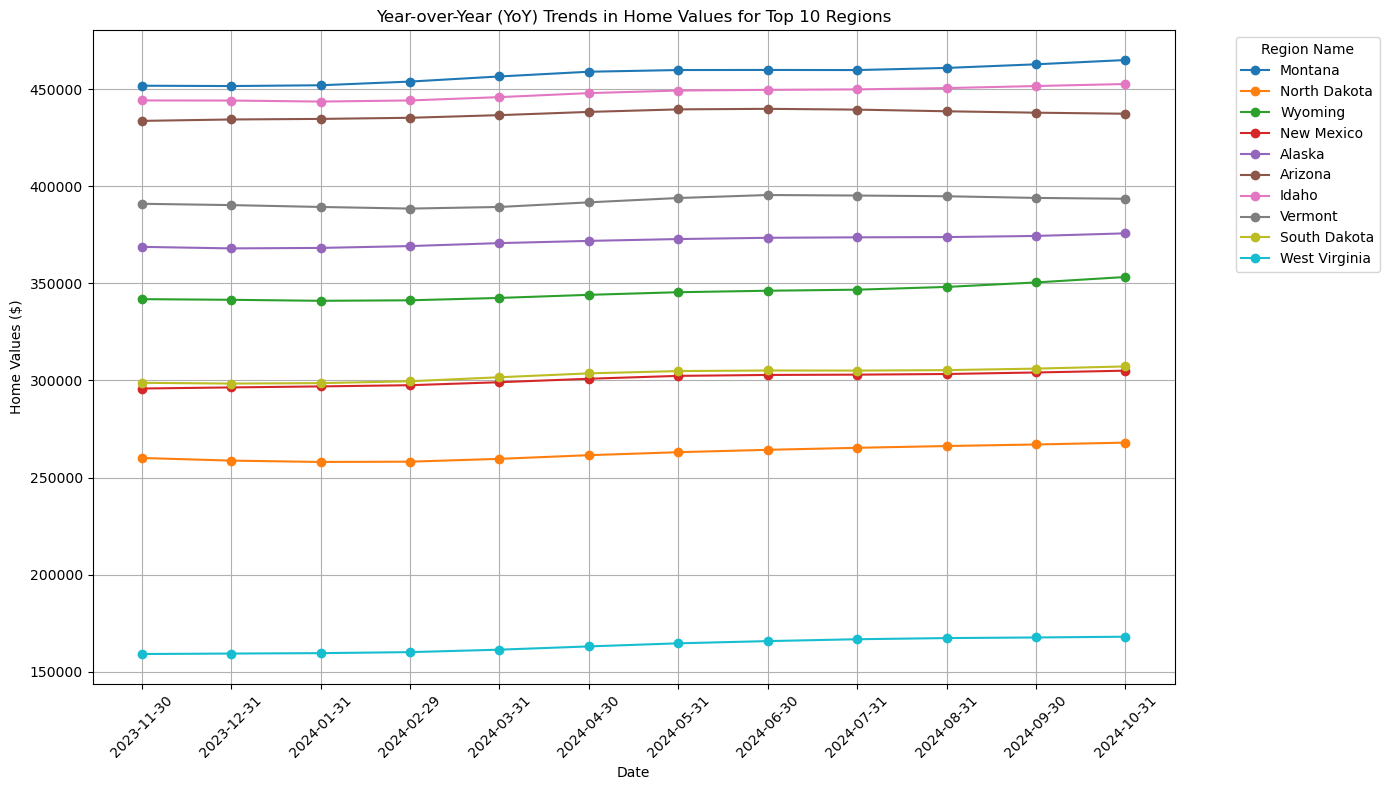

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the GitHub link
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/ZHVI%20Single-Family%20Homes%20Time%20Series.xlsx'
zhvi_data = pd.read_excel(file_url)


# Step 1: Handle missing or null values by replacing them with 0
zhvi_data.fillna(0, inplace=True)

# Step 2: Identify and rename date columns dynamically
# Define non-date columns
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in zhvi_data.columns if col not in non_date_columns]

# Rename date columns to consistent format (YYYY-MM-DD)
renamed_date_columns = {}
for col in date_columns:
    try:
        parsed_date = pd.to_datetime(col, format='%m/%d/%Y', errors='coerce')
        if parsed_date is not pd.NaT:
            renamed_date_columns[col] = parsed_date.strftime('%Y-%m-%d')
    except Exception as e:
        print(f"Error parsing column {col}: {e}")

zhvi_data.rename(columns=renamed_date_columns, inplace=True)

# Identify renamed date columns
date_columns_renamed = [col for col in zhvi_data.columns if col not in non_date_columns]

# Step 3: Analyze trends
if len(date_columns_renamed) < 12:
    print("Insufficient data for Year-over-Year trends. Calculating Month-over-Month trends instead.")
    
    # Calculate Month-over-Month (MoM) changes for the most recent year
    mom_changes = {}
    for i in range(1, len(date_columns_renamed)):
        current_month = date_columns_renamed[i]
        previous_month = date_columns_renamed[i - 1]
        mom_changes[f"{current_month}_MoM"] = (
            (zhvi_data[current_month] - zhvi_data[previous_month]) /
            zhvi_data[previous_month].replace(0, 1) * 100
        )

    # Add MoM changes to the DataFrame
    mom_changes_df = pd.DataFrame(mom_changes)
    zhvi_data = pd.concat([zhvi_data.reset_index(drop=True), mom_changes_df.reset_index(drop=True)], axis=1)

    # Calculate average MoM change across the available months
    mom_columns = list(mom_changes.keys())
    zhvi_data['Average_MoM_Change'] = zhvi_data[mom_columns].mean(axis=1)

    # Select the top 10 regions by average MoM change
    top_10_mom_regions = zhvi_data.sort_values(by='Average_MoM_Change', ascending=False).head(10)

    # Visualize MoM trends for the top 10 regions
    plt.figure(figsize=(14, 8))
    for region in top_10_mom_regions['RegionName']:
        region_data = zhvi_data[zhvi_data['RegionName'] == region]
        plt.plot(
            date_columns_renamed,
            region_data[date_columns_renamed].values.flatten(),
            marker='o', linestyle='-', label=region
        )

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Home Values ($)')
    plt.title('Month-over-Month (MoM) Trends in Home Values for Top 10 Regions')
    plt.grid(True)
    plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Sufficient data for Year-over-Year trends. Calculating YoY trends.")
    
    # Calculate YoY trends for the most recent 12 months dynamically
    last_12_months = date_columns_renamed[-12:]

    yoy_changes = {}
    for i in range(12, len(date_columns_renamed)):
        current_month = date_columns_renamed[i]
        previous_year_month = date_columns_renamed[i - 12]
        yoy_changes[f"{current_month}_YoY"] = (
            (zhvi_data[current_month] - zhvi_data[previous_year_month]) /
            zhvi_data[previous_year_month].replace(0, 1) * 100
        )

    # Add YoY changes to the DataFrame
    yoy_changes_df = pd.DataFrame(yoy_changes)
    zhvi_data = pd.concat([zhvi_data.reset_index(drop=True), yoy_changes_df.reset_index(drop=True)], axis=1)

    # Calculate average YoY change for the last 12 months
    yoy_columns = list(yoy_changes.keys())
    zhvi_data['Average_YoY_Change'] = zhvi_data[yoy_columns].mean(axis=1)

    # Select the top 10 regions by average YoY change
    top_10_yoy_regions = zhvi_data.sort_values(by='Average_YoY_Change', ascending=False).head(10)

    # Visualize YoY trends for the top 10 regions
    plt.figure(figsize=(14, 8))
    for region in top_10_yoy_regions['RegionName']:
        region_data = zhvi_data[zhvi_data['RegionName'] == region]
        plt.plot(
            last_12_months,
            region_data[last_12_months].values.flatten(),
            marker='o', linestyle='-', label=region
        )

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Home Values ($)')
    plt.title('Year-over-Year (YoY) Trends in Home Values for Top 10 Regions')
    plt.grid(True)
    plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<u>**Year-over-Year (YoY) Trends in Home Values for Top 10 Regions**</u>

This line chart showcases the Year-over-Year (YoY) trends in home values for the top 10 U.S. regions from November 2023 to October 2024. Each line reflects the home value progression in a specific region, highlighting consistent growth patterns over the last 12 months. Regions like Montana and North Dakota exhibit the highest home values, reflecting steady market demand.

---

###  Rental Apartment Market Trends Analysis

This analysis focuses on identifying trends in the rental apartment market across the United States. By examining historical data on rental prices for multi-family residences. It calculates key metrics such as 1-year percentage growth to highlight the top-performing rental markets. The insights are tailored for investors looking to make data-driven decisions in the rental apartment sector.

Validation: All missing values have been handled.
Top 10 US Rental Apartment Markets by 1-Year Growth:
            RegionName StateName  1yr_change
398     Hinesville, GA        GA   15.896130
400     Statesboro, GA        GA   15.056123
225       Florence, SC        SC   13.980444
197         Topeka, KS        KS   12.930356
294        Lebanon, PA        PA   12.915073
418  Klamath Falls, OR        OR   12.542417
302         Sumter, SC        SC   12.308361
236       Kingston, NY        NY   12.301609
344  Michigan City, IN        IN   12.166573
343         Muncie, IN        IN   11.885996
Top 10 US Rental Apartment Markets by Month-over-Month Growth:
             RegionName StateName  MoM_change
294         Lebanon, PA        PA    8.783260
391          Helena, MT        MT    8.003697
422  Mount Pleasant, MI        MI    5.599617
436    Fergus Falls, MN        MN    5.213299
295      Morristown, TN        TN    4.683450
444        Fairmont, WV        WV    4.453407
447          Oxfo

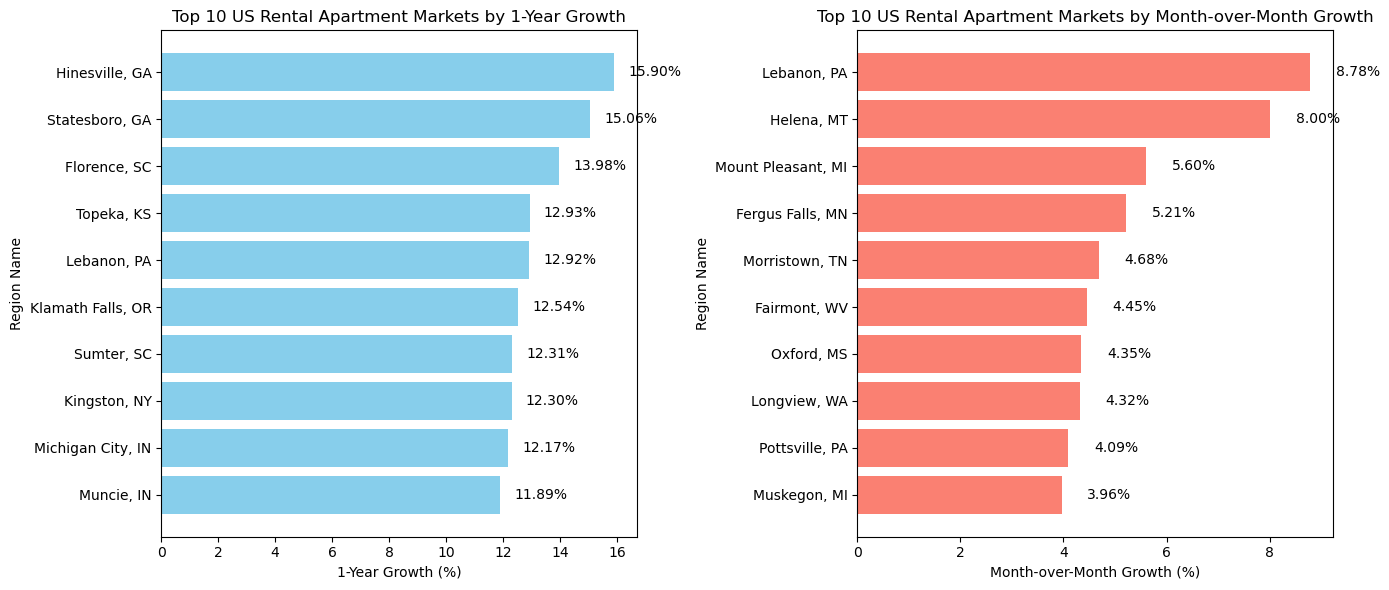

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/Rental%20Multi-Family%20Residence_month.xlsx'
rental_data = pd.read_excel(file_url)

# Step 2: Handle missing or null values by replacing them with 0
rental_data.fillna(0, inplace=True)

# Validate: Check if there are any remaining missing values
if rental_data.isnull().sum().sum() > 0:
    print("There are still null values in the dataset.")
else:
    print("Validation: All missing values have been handled.")

# Step 3: Focus on the relevant data
# Select RegionName, StateName, and the last 13 months of rental data
recent_rental_data = rental_data[['RegionName', 'StateName'] + list(rental_data.columns[-13:])].copy()

# Step 4A: Calculate the 1-Year Growth
filtered_rental_data = recent_rental_data[recent_rental_data.iloc[:, -13] > 1].copy()  # Explicit copy
filtered_rental_data['1yr_change'] = (
    (filtered_rental_data.iloc[:, -1] - filtered_rental_data.iloc[:, -13]) /
    filtered_rental_data.iloc[:, -13] * 100
)

# Step 4B: Calculate the Month-over-Month (MoM) Growth
recent_rental_data = recent_rental_data[recent_rental_data.iloc[:, -2] > 1].copy()  # Explicit copy
recent_rental_data['MoM_change'] = (
    (recent_rental_data.iloc[:, -1] - recent_rental_data.iloc[:, -2]) /
    recent_rental_data.iloc[:, -2] * 100
)

# Step 5A: Top 10 Regions by 1-Year Growth
top_1yr_rental_markets = filtered_rental_data.sort_values(by='1yr_change', ascending=False).head(10)

# Display 1-Year Growth Results
print("Top 10 US Rental Apartment Markets by 1-Year Growth:")
print(top_1yr_rental_markets[['RegionName', 'StateName', '1yr_change']])

# Step 5B: Top 10 Regions by MoM Growth
top_mom_rental_markets = recent_rental_data.sort_values(by='MoM_change', ascending=False).head(10)

# Display MoM Growth Results
print("Top 10 US Rental Apartment Markets by Month-over-Month Growth:")
print(top_mom_rental_markets[['RegionName', 'StateName', 'MoM_change']])

# Step 6: Visualization

# 1-Year Growth Chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bars_1yr = plt.barh(top_1yr_rental_markets['RegionName'], top_1yr_rental_markets['1yr_change'], color='skyblue')
plt.xlabel('1-Year Growth (%)')
plt.ylabel('Region Name')
plt.title('Top 10 US Rental Apartment Markets by 1-Year Growth')
for bar in bars_1yr:
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}%',
        va='center',
        ha='left'
    )
plt.gca().invert_yaxis()

# Month-over-Month Growth Chart
plt.subplot(1, 2, 2)
bars_mom = plt.barh(top_mom_rental_markets['RegionName'], top_mom_rental_markets['MoM_change'], color='salmon')
plt.xlabel('Month-over-Month Growth (%)')
plt.ylabel('Region Name')
plt.title('Top 10 US Rental Apartment Markets by Month-over-Month Growth')
for bar in bars_mom:
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}%',
        va='center',
        ha='left'
    )
plt.gca().invert_yaxis()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<u>**Rental Apartment Market Trends Analysis**</u>

The bar charts provide insights into the top 10 US rental apartment markets by **1-Year** Growth and **Month-over-Month (MoM)** Growth. The left chart highlights regions with the highest percentage increases in rental apartment prices over the past year, while the right chart focuses on short-term growth trends from the most recent month.

**Key Insights:**

1. **1-Year Growth:**
    - Hinesville, GA, leads the 1-Year Growth chart with a 15.90% increase, followed closely by Statesboro, GA (15.05%), and Florence, SC (13.98%).

2. **Month-over-Month Growth:**
    - Lebanon, PA, exhibits the highest MoM growth at 8.78%, with Helena, MT (8.00%) and Mount Pleasant, MI (5.60%) following.


---

### Year-over-Year (YoY) Trends in Rental Prices for Top 10 Regions  

Sufficient data for Year-over-Year (YoY) trends. Calculating YoY trends.


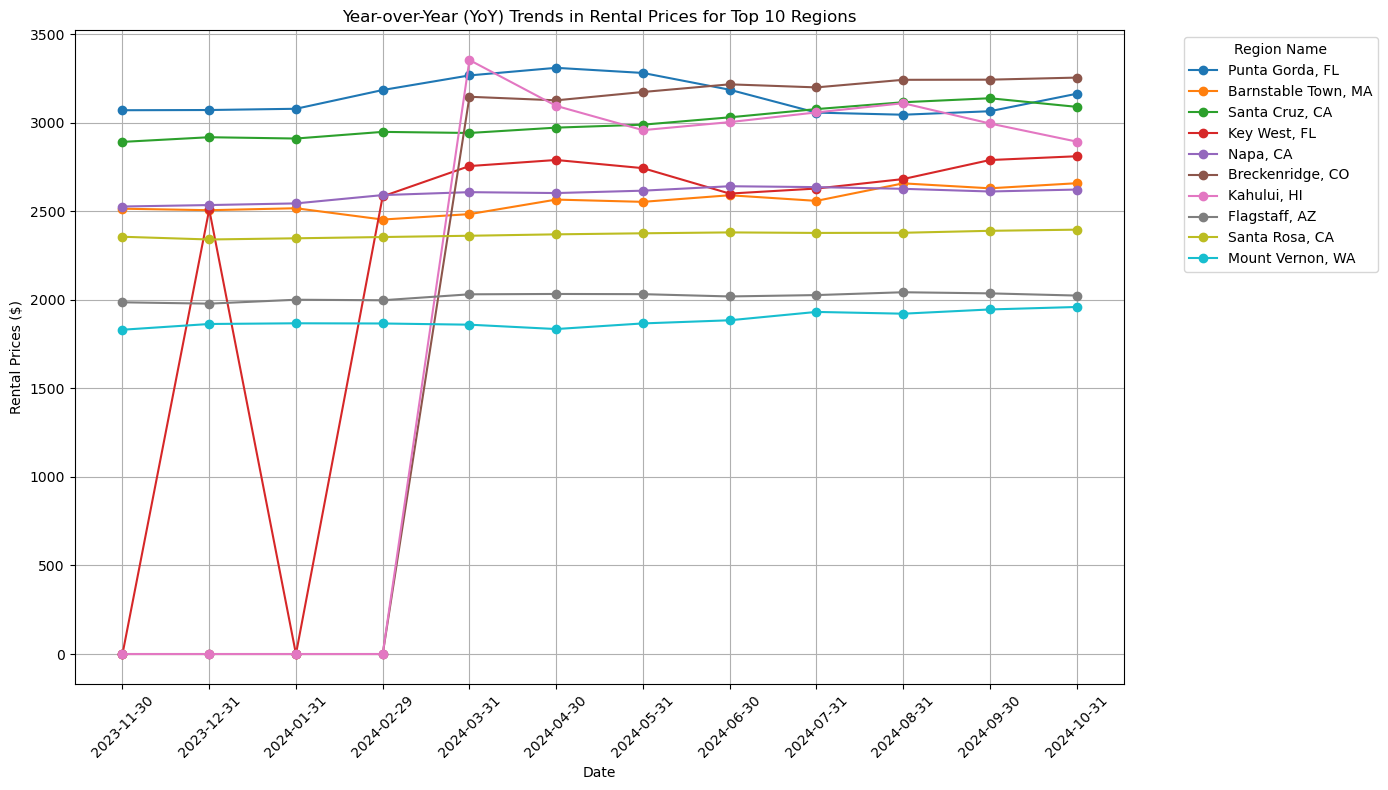

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/Rental%20Multi-Family%20Residence_month.xlsx'
rental_data = pd.read_excel(file_url)

# Step 1: Handle missing or null values by replacing them with 0
rental_data.fillna(0, inplace=True)

# Step 2: Identify and rename date columns dynamically
non_date_columns = ['RegionName', 'StateName']
date_columns = [col for col in rental_data.columns if col not in non_date_columns]

# Rename date columns to consistent format (YYYY-MM-DD)
renamed_date_columns = {}
for col in date_columns:
    try:
        parsed_date = pd.to_datetime(col, format='%m/%d/%Y', errors='coerce')
        if parsed_date is not pd.NaT:
            renamed_date_columns[col] = parsed_date.strftime('%Y-%m-%d')
    except Exception as e:
        print(f"Error parsing column {col}: {e}")

rental_data.rename(columns=renamed_date_columns, inplace=True)

# Identify renamed date columns
date_columns_renamed = [col for col in rental_data.columns if col not in non_date_columns]

# Convert date columns to numeric
for col in date_columns_renamed:
    rental_data[col] = pd.to_numeric(rental_data[col], errors='coerce')

# Analyze trends
if len(date_columns_renamed) < 12:
    print("Insufficient data for Year-over-Year (YoY) trends. Calculating Month-over-Month (MoM) trends instead.")
    
    # Calculate Month-over-Month (MoM) changes for the most recent months
    mom_changes = {}
    for i in range(1, len(date_columns_renamed)):
        current_month = date_columns_renamed[i]
        previous_month = date_columns_renamed[i - 1]
        mom_changes[f"{current_month}_MoM"] = (
            (rental_data[current_month] - rental_data[previous_month]) /
            rental_data[previous_month].replace(0, 1) * 100
        )

    # Add MoM changes to the DataFrame
    mom_changes_df = pd.DataFrame(mom_changes)
    rental_data = pd.concat([rental_data.reset_index(drop=True), mom_changes_df.reset_index(drop=True)], axis=1)

    # Calculate average MoM change across the available months
    mom_columns = list(mom_changes.keys())
    rental_data['Average_MoM_Change'] = rental_data[mom_columns].mean(axis=1)

    # Select the top 10 regions by average MoM change
    top_10_mom_regions = rental_data.sort_values(by='Average_MoM_Change', ascending=False).head(10)

    # Visualize MoM trends for the top 10 regions
    plt.figure(figsize=(14, 8))
    for region in top_10_mom_regions['RegionName']:
        region_data = rental_data[rental_data['RegionName'] == region]
        plt.plot(
            date_columns_renamed,
            region_data[date_columns_renamed].values.flatten(),
            marker='o', linestyle='-', label=region
        )

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Rental Prices ($)')
    plt.title('Month-over-Month (MoM) Trends in Rental Prices for Top 10 Regions')
    plt.grid(True)
    plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Sufficient data for Year-over-Year (YoY) trends. Calculating YoY trends.")
    
    # Calculate YoY trends for the most recent 12 months dynamically
    last_12_months = date_columns_renamed[-12:]

    yoy_changes = {}
    for i in range(12, len(date_columns_renamed)):
        current_month = date_columns_renamed[i]
        previous_year_month = date_columns_renamed[i - 12]
        yoy_changes[f"{current_month}_YoY"] = (
            (rental_data[current_month] - rental_data[previous_year_month]) /
            rental_data[previous_year_month].replace(0, 1) * 100
        )

    # Add YoY changes to the DataFrame
    yoy_changes_df = pd.DataFrame(yoy_changes)
    rental_data = pd.concat([rental_data.reset_index(drop=True), yoy_changes_df.reset_index(drop=True)], axis=1)

    # Calculate average YoY change for the last 12 months
    yoy_columns = list(yoy_changes.keys())
    rental_data['Average_YoY_Change'] = rental_data[yoy_columns].mean(axis=1)

    # Select the top 10 regions by average YoY change
    top_10_yoy_regions = rental_data.sort_values(by='Average_YoY_Change', ascending=False).head(10)

    # Visualize YoY trends for the top 10 regions
    plt.figure(figsize=(14, 8))
    for region in top_10_yoy_regions['RegionName']:
        region_data = rental_data[rental_data['RegionName'] == region]
        plt.plot(
            last_12_months,
            region_data[last_12_months].values.flatten(),
            marker='o', linestyle='-', label=region
        )

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Rental Prices ($)')
    plt.title('Year-over-Year (YoY) Trends in Rental Prices for Top 10 Regions')
    plt.grid(True)
    plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Year-over-Year (YoY) Trends in Rental Prices for Top 10 Regions**

This line chart highlights Year-over-Year (YoY) trends in rental prices for the top 10 regions in the United States from November 2023 to October 2024. The graph provides a clear visualization of annual changes, showcasing regional performance and rental price patterns over the past year.


---

### `2) Are the sale prices and inventory listing going up or down overall in the US? 10 points`

### Month-over-Month (MoM) and Year-over-Year (YoY) Changes in Inventory Listings for Top Regions

Validation: All missing values have been handled.
Top 10 Regions by 1-Year Change in Inventory Listings:
           RegionName StateName  1yr_change
797     Cleveland, MS        MS  204.000000
878         Pampa, TX        TX  113.235294
879    Clarksdale, MS        MS   90.000000
836        Grants, NM        NM   87.500000
896  Raymondville, TX        TX   74.193548
819      Van Wert, OH        OH   70.000000
875       Liberal, KS        KS   69.444444
833       Eufaula, AL        AL   65.789474
871       Yankton, SD        SD   60.714286
767    Laurinburg, NC        NC   60.377358

Top 10 Regions by Month-over-Month (MoM) Change in Inventory Listings:
           RegionName StateName  MoM_change
797     Cleveland, MS        MS  168.421053
879    Clarksdale, MS        MS  136.842105
836        Grants, NM        NM   45.833333
896  Raymondville, TX        TX   37.395460
875       Liberal, KS        KS   13.843352
819      Van Wert, OH        OH  -17.647059
878         Pampa, TX        TX

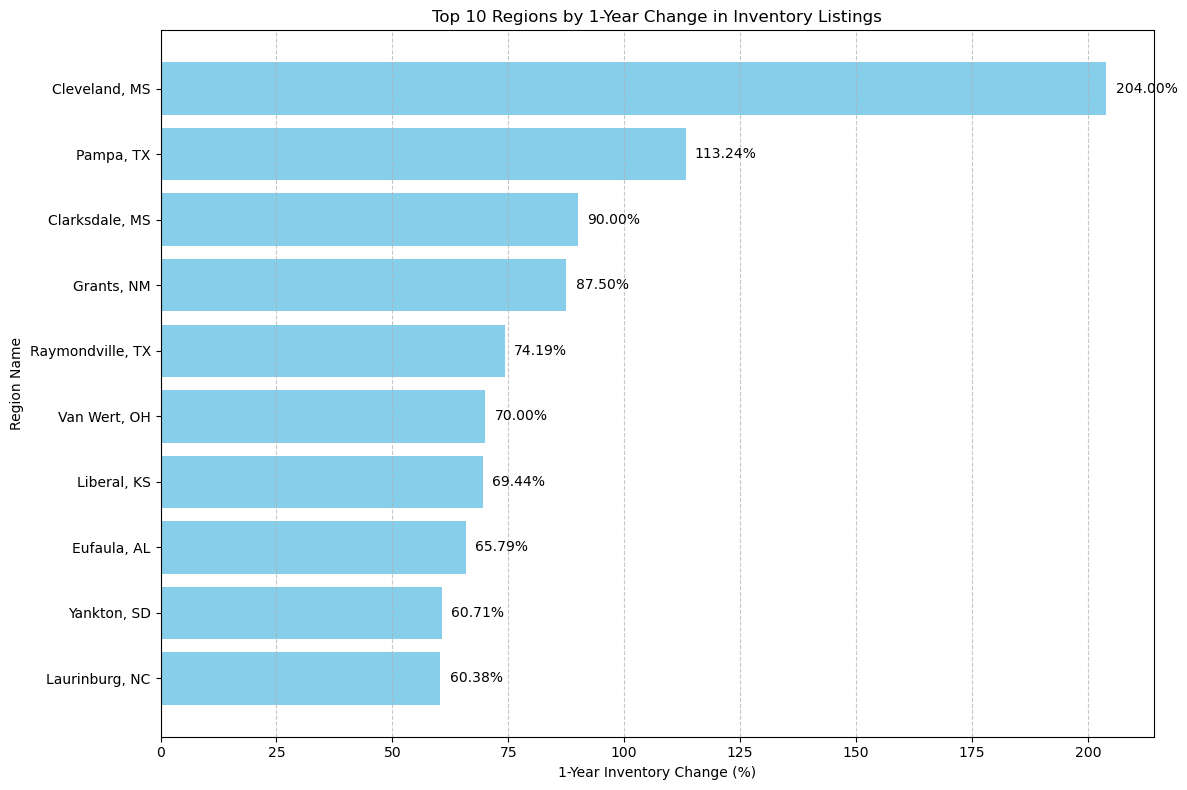

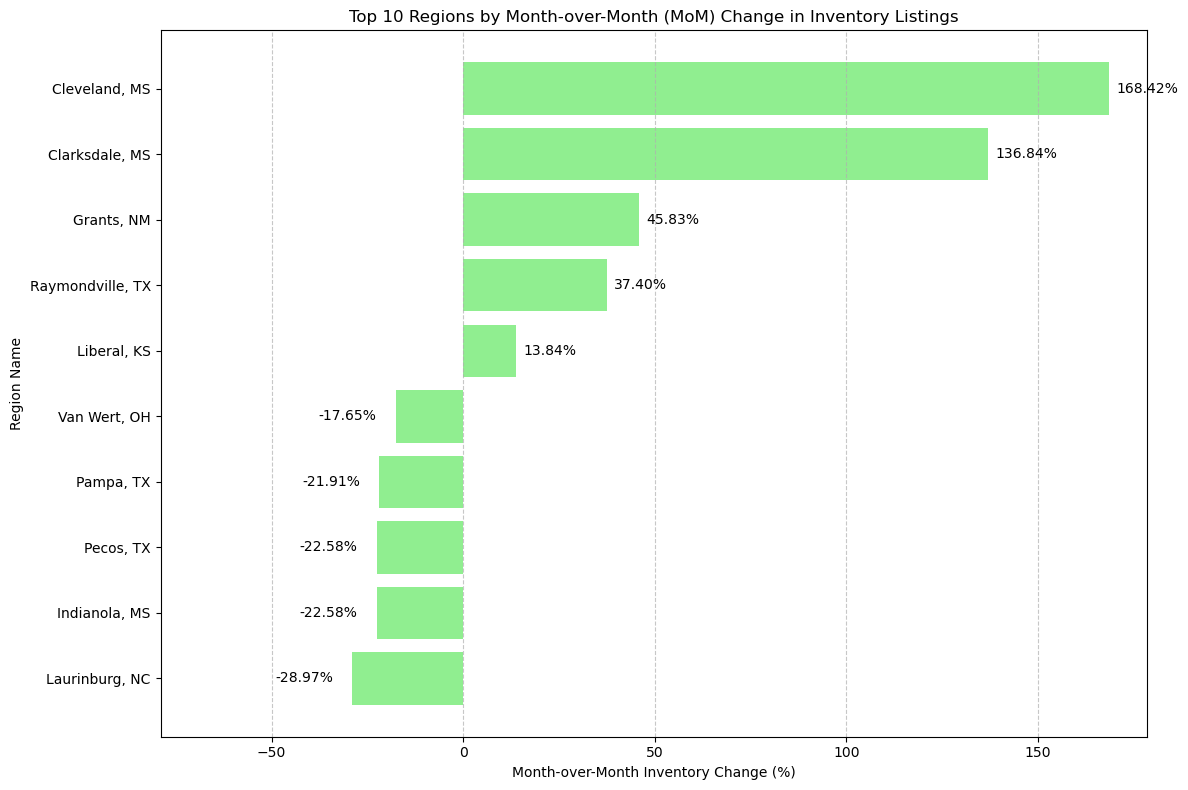

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the GitHub link
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/For%20Sale%20Inventory%20SFR%20Monlty.xlsx'
inventory_data = pd.read_excel(file_url)

# Step 1: Handle missing or null values by replacing them with 0
inventory_data.fillna(0, inplace=True)

# Validate: Check if there are any remaining missing values
if inventory_data.isnull().sum().sum() > 0:
    print("There are still null values in the dataset.")
else:
    print("Validation: All missing values have been handled.")

# Step 2: relevant data
# Select RegionName, StateName, and the last 13 months of inventory data
recent_inventory_data = inventory_data[['RegionName', 'StateName'] + list(inventory_data.columns[-13:])].copy()

# Step 3: Filter out rows with near-zero values from 12 months ago
recent_inventory_data = recent_inventory_data[recent_inventory_data.iloc[:, -13] > 1]  

# Step 4: Calculate the 1-year percentage change for inventory listings
recent_inventory_data['1yr_change'] = (
    (recent_inventory_data.iloc[:, -1] - recent_inventory_data.iloc[:, -13]) / recent_inventory_data.iloc[:, -13] * 100
)

# Step 5: Calculate Month-over-Month (MoM) percentage change for the most recent month
recent_inventory_data['MoM_change'] = (
    (recent_inventory_data.iloc[:, -1] - recent_inventory_data.iloc[:, -2]) / recent_inventory_data.iloc[:, -2] * 100
)

# Step 6: Sort the data for 1-year and MoM changes
top_inventory_1yr_changes = recent_inventory_data.sort_values(by='1yr_change', ascending=False).head(10)
top_inventory_mom_changes = recent_inventory_data.sort_values(by='MoM_change', ascending=False).head(10)

# Display results in table format
print("Top 10 Regions by 1-Year Change in Inventory Listings:")
print(top_inventory_1yr_changes[['RegionName', 'StateName', '1yr_change']])

print("\nTop 10 Regions by Month-over-Month (MoM) Change in Inventory Listings:")
print(top_inventory_mom_changes[['RegionName', 'StateName', 'MoM_change']])

# Step 7: Visualize the 1-Year Change
plt.figure(figsize=(12, 8))
bars = plt.barh(top_inventory_1yr_changes['RegionName'], top_inventory_1yr_changes['1yr_change'], color='skyblue')

plt.xlabel('1-Year Inventory Change (%)')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by 1-Year Change in Inventory Listings')

# Add percentage numbers on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 2,  # Position the label slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f'{bar.get_width():.2f}%',  # Display the percentage change
        va='center',  # Vertical alignment
        ha='left'  # Horizontal alignment
    )

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest changes at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()
plt.show()

# Step 8: Visualize the Month-over-Month (MoM) Change
plt.figure(figsize=(12, 8))
bars = plt.barh(top_inventory_mom_changes['RegionName'], top_inventory_mom_changes['MoM_change'], color='lightgreen')

# Adjust x-axis limits to include padding for negative values
plt.xlim(min(top_inventory_mom_changes['MoM_change'].min() - 50, -50), top_inventory_mom_changes['MoM_change'].max() + 10)

plt.xlabel('Month-over-Month Inventory Change (%)')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by Month-over-Month (MoM) Change in Inventory Listings')

# Adjust labels for negative and positive values
for bar in bars:
    label_position = bar.get_width() - 5 if bar.get_width() < 0 else bar.get_width() + 2  
    plt.text(
        label_position,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.2f}%',  
        va='center',  
        ha='right' if bar.get_width() < 0 else 'left'  
    )

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest changes at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()
plt.show()


<u>**Month-over-Month (MoM) and Year-over-Year (YoY) Changes in Inventory Listings for Top Regions**</u>

The first graph illustrates the **Year-over-Year (YoY) percentage changes** in inventory listings over the most recent 13 months, capturing long-term trends in regional real estate markets. The second graph highlights the top 10 regions in the U.S. with the most significant **Month-over-Month (MoM) changes** in inventory listings during the same 13-month period, showcasing both <u style='color:green;'>increases</u> and <u style='color:red;'>decreases</u>.These visualizations provide a comparative understanding of short-term fluctuations and annual trends in inventory availability.

**Key Insights:**  

1. **Year-over-Year (YoY) Insights:**  
   - Cleveland, MS, led the YoY inventory growth with a remarkable 204% increase, followed by Pampa, TX, with 113.24%.  
   - The YoY trends indicate consistent growth in inventory across several regions, suggesting evolving market dynamics in real estate.  
   
2. **Month-over-Month (MoM) Insights:**  
   - Cleveland, MS, and Clarksdale, MS, exhibited the highest MoM growth in inventory, with increases of 168.42% and 136.84%, respectively.  
   - Laurinburg, NC, showed the most significant MoM decline, with a decrease of -28.97%.  

---

### Year-over-Year (YoY) Trends in Real Estate Inventory for Top 10 Regions

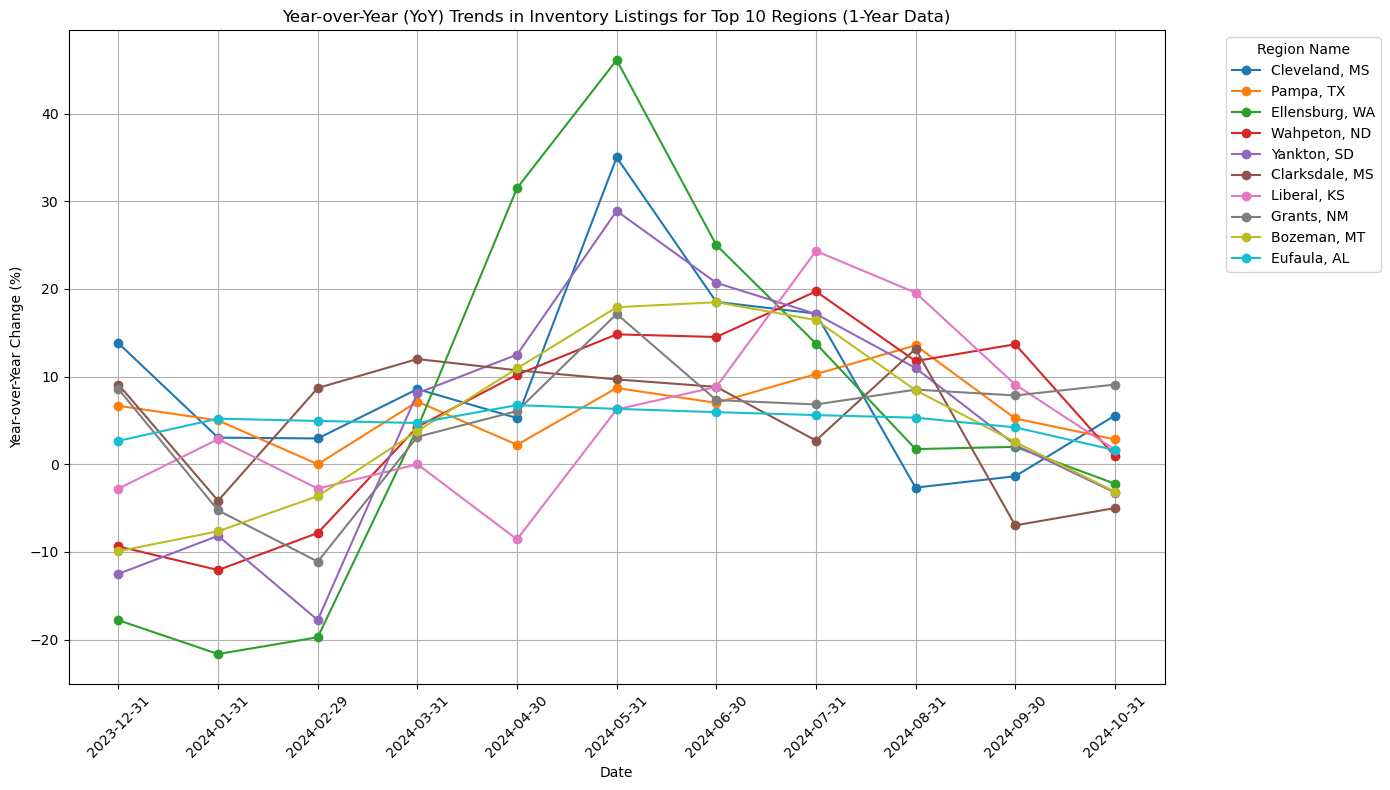

In [81]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the GitHub link
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/For%20Sale%20Inventory%20SFR%20Monlty.xlsx'
inventory_data = pd.read_excel(file_url)

# Step 1: Handle missing or null values by replacing them with 0
inventory_data.fillna(0, inplace=True)

# Step 2: Identify and rename date columns dynamically
non_date_columns = ['RegionName', 'StateName']
date_columns = [col for col in inventory_data.columns if col not in non_date_columns]

# Rename date columns to consistent format (YYYY-MM-DD)
renamed_date_columns = {}
for col in date_columns:
    try:
        parsed_date = pd.to_datetime(col, format='%m/%d/%Y', errors='coerce')
        if parsed_date is not pd.NaT and parsed_date <= pd.to_datetime("2024-10-31"):  # Exclude beyond 10/31/2024
            renamed_date_columns[col] = parsed_date.strftime('%Y-%m-%d')
    except Exception as e:
        print(f"Error parsing column {col}: {e}")

inventory_data.rename(columns=renamed_date_columns, inplace=True)

# Identify renamed date columns
date_columns_renamed = [col for col in inventory_data.columns if col not in non_date_columns]

# Convert date columns to numeric
for col in date_columns_renamed:
    inventory_data[col] = pd.to_numeric(inventory_data[col], errors='coerce')

# Step 3: Focus on only the last 12 months of data
if len(date_columns_renamed) >= 12:
    last_12_months = date_columns_renamed[-12:]
else:
    print("Insufficient data for 1-year YoY analysis.")
    last_12_months = date_columns_renamed

# Step 4: Calculate YoY trends for the last 12 months
yoy_changes = {}
for i in range(1, len(last_12_months)):
    current_month = last_12_months[i]
    previous_month = last_12_months[i - 1]
    yoy_changes[current_month] = (
        (inventory_data[current_month] - inventory_data[previous_month]) /
        inventory_data[previous_month].replace(0, 1) * 100
    )

# Create a DataFrame for YoY changes
yoy_changes_df = pd.DataFrame(yoy_changes)
yoy_changes_df['RegionName'] = inventory_data['RegionName']
yoy_changes_df['StateName'] = inventory_data['StateName']

# Step 5: Calculate average YoY change for each region
yoy_changes_df['Average_YoY_Change'] = yoy_changes_df.drop(['RegionName', 'StateName'], axis=1).mean(axis=1)

# Step 6: Select the top 10 regions by average YoY change
top_10_yoy_regions = yoy_changes_df.sort_values(by='Average_YoY_Change', ascending=False).head(10)

# Step 7: Visualize YoY trends for the top 10 regions
plt.figure(figsize=(14, 8))
for _, row in top_10_yoy_regions.iterrows():
    region_name = row['RegionName']
    region_yoy_data = row.drop(['RegionName', 'StateName', 'Average_YoY_Change'])
    plt.plot(
        region_yoy_data.index, 
        region_yoy_data.values, 
        marker='o', linestyle='-', label=region_name
    )

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Year-over-Year (YoY) Trends in Inventory Listings for Top 10 Regions (1-Year Data)')
plt.grid(True)
plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<u>**Year-over-Year (YoY) Trends in Inventory Listings for Top 10 Regions (12-Month Data)** </u>

This line chart visualizes the Year-over-Year (YoY) percentage changes in inventory listings across the top 10 regions in the United States, based on data from the most recent 12 months. Each line represents trends in a specific region, illustrating fluctuations and highlighting patterns of growth or decline in real estate inventory availability over time.

### **Key Insights:**

1. **Significant Increases:**  
   Regions like *Ellensburg, WA* and *Grants, NM* showed notable spikes in inventory during certain months, reflecting sharp growth periods in YoY changes.

2. **Gradual Trends:**  
   *Cleveland, MS* and *Bozeman, MT* demonstrated consistent increases over time, suggesting steady market demand in these areas.

3. **Declines in Some Regions:**  
   Some regions, such as *Wahpeton, ND* and *Yankton, SD,* experienced consistent declines in inventory YoY, indicating potential market contraction.

---

### Median List Price Trends Analysis for Single-Family Homes  

This analysis examines the **1-year percentage change** in median list prices for single-family homes across the United States. By leveraging the most recent 13 months of data, it identifies the top-performing regions in terms of price growth and calculates the national average trend. The results provide valuable insights for understanding market dynamics and guiding investment decisions.

Validation: All missing values have been handled.
National 1-Year Average Change in Median List Prices: 5.33%
Top 10 Regions by 1-Year Change in Median List Prices:
         RegionName StateName  1yr_change
696   Clewiston, FL        FL  199.631242
879  Clarksdale, MS        MS   52.571429
787   Mount Gay, WV        WV   49.502158
829      Macomb, IL        IL   47.519065
881    Beatrice, NE        NE   44.366565
926      Vernon, TX        TX   41.829787
907    Hereford, TX        TX   38.566658
556      Oxford, MS        MS   37.165502
900     Parsons, KS        KS   36.621160
663   Lewisburg, PA        PA   35.579777


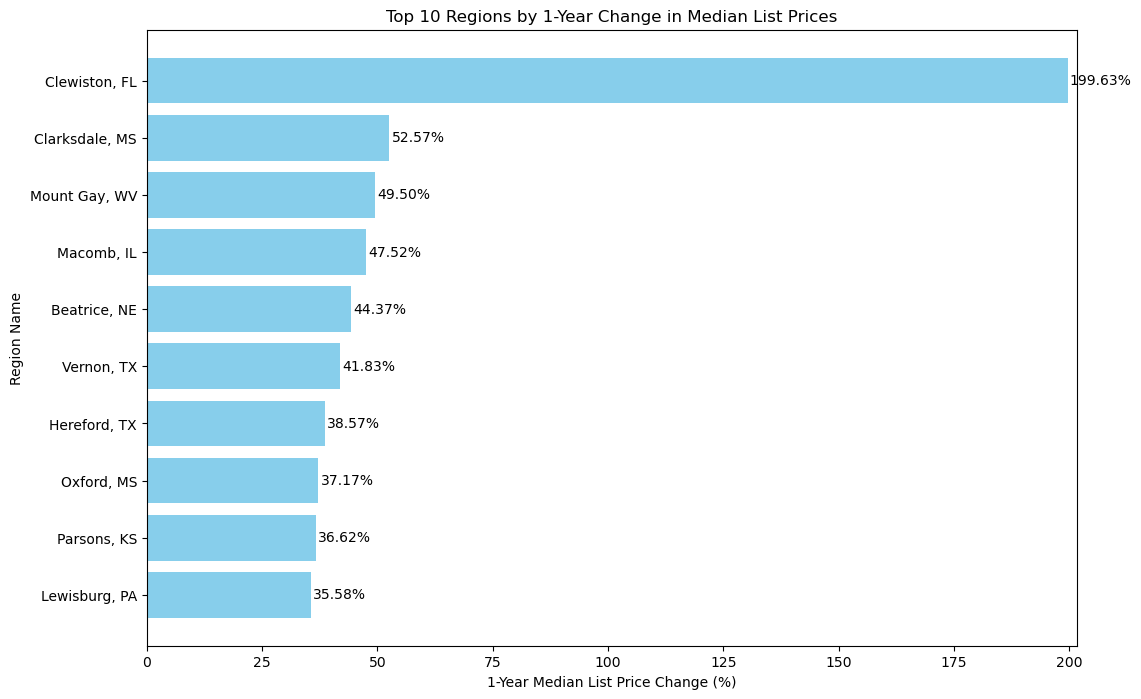

In [143]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the GitHub link
file_url = 'https://github.com/MassaraSoftware/FinalProject/raw/main/Median%20List%20Price%20SFR%20Monthly.xlsx'
list_price_data = pd.read_excel(file_url)

# Step 1: Handle missing or null values by replacing them with 0
list_price_data.fillna(0, inplace=True)

# Validate: Check if there are any remaining missing values
if list_price_data.isnull().sum().sum() > 0:
    print("There are still null values in the dataset.")
else:
    print("Validation: All missing values have been handled.")

# Step 2: Relevant data
# Select RegionName, StateName, and the last 13 months of median list price data
recent_list_price_data = list_price_data[['RegionName', 'StateName'] + list(list_price_data.columns[-13:])].copy()

# Step 3: Filter out rows with near-zero values from 12 months ago
recent_list_price_data = recent_list_price_data[recent_list_price_data.iloc[:, -13] > 1]  # Exclude near-zero base values

# Step 4: Calculate the 1-year percentage change for median list prices
recent_list_price_data['1yr_change'] = (
    (recent_list_price_data.iloc[:, -1] - recent_list_price_data.iloc[:, -13]) / recent_list_price_data.iloc[:, -13] * 100
)

# Step 5: Calculate the national trend by averaging the 1-year change
national_price_trend = recent_list_price_data['1yr_change'].mean()

# Step 6: Display the trend in a DataFrame format for top 10 regions
top_price_changes = recent_list_price_data.sort_values(by='1yr_change', ascending=False).head(10)
print("National 1-Year Average Change in Median List Prices: {:.2f}%".format(national_price_trend))
print("Top 10 Regions by 1-Year Change in Median List Prices:")
print(top_price_changes[['RegionName', 'StateName', '1yr_change']])

# Step 7: Visualize the trend across regions
plt.figure(figsize=(12, 8))
bars = plt.barh(top_price_changes['RegionName'], top_price_changes['1yr_change'], color='skyblue')

# Set x-axis limits to add padding for labels
plt.xlim(0, top_price_changes['1yr_change'].max() + 2)  # Add 2% padding to the max value

plt.xlabel('1-Year Median List Price Change (%)')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by 1-Year Change in Median List Prices')

# Add percentage labels to bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.2f}%', 
        va='center',  # Vertical alignment
        ha='left'  # Horizontal alignment
    )

# Invert the y-axis to show the highest changes at the top
plt.gca().invert_yaxis()
plt.show()


<u> **Top 10 Regions by 1-Year Change in Median List Prices:** </u>

This bar chart highlights the top 10 regions in the United States with the highest percentage changes in median list prices over the most recent 12 month. **Clewiston, FL**, has shown **199.63% increase**, significantly outpacing all other regions. Other regions like **Clarksdale, MS (52.57%)** and **Mount Gay, WV (49.50%)** also demonstrate strong growth.

---